# Create app to build images of cities connected by dots

In [1]:
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from PIL import Image, ImageDraw


### Step 2: Get GPS Coordinates of Cities
Use Geopy's Nominatim to fetch GPS coordinates of cities. You can make a function to simplify this:

In [2]:
def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_mapper")
    location = geolocator.geocode(city_name)
    return (location.latitude, location.longitude)


### Step 3: Prepare Cities and Coordinates
Create a list of cities you want to connect, then fetch their coordinates:

In [3]:
cities = ["New York, USA", "London, UK", "Paris, France", "Berlin, Germany"]

coordinates = [get_coordinates(city) for city in cities]


### Step 4: Plot Cities and Connect Them
Now, plot the cities and draw lines connecting them. Use Matplotlib to create the visualization.

In [4]:
def plot_cities(coordinates, cities):
    # Unpack the coordinates
    latitudes, longitudes = zip(*coordinates)
    
    plt.figure(figsize=(8, 6))

    # Plot each city as a point
    plt.scatter(longitudes, latitudes, color="red", zorder=5)
    
    # Annotate cities on the plot
    for i, city in enumerate(cities):
        plt.text(longitudes[i] + 0.1, latitudes[i] + 0.1, city, fontsize=9)
    
    # Draw lines connecting the cities
    plt.plot(longitudes, latitudes, color="blue", linewidth=2, zorder=3)

    # Set background color and grid
    plt.gca().set_facecolor('lightblue')
    plt.grid(True)

    # Labels
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    # Show the plot
    plt.show()


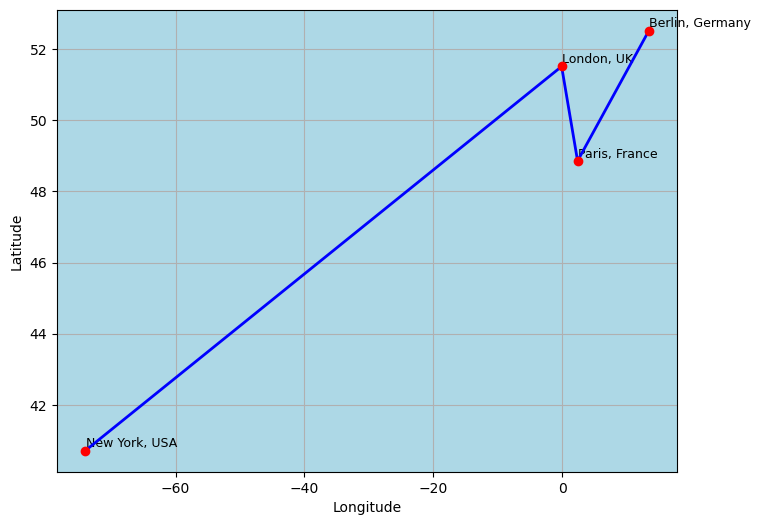

In [5]:
plot_cities(coordinates, cities)


This will create a plot of cities with lines connecting them.

### Step 5: Calculate Distances Between Cities (Optional)
You can also calculate the distances between the cities using Geopy’s geodesic method:

In [6]:
def calculate_distances(coordinates):
    distances = []
    for i in range(len(coordinates) - 1):
        distances.append(geodesic(coordinates[i], coordinates[i+1]).kilometers)
    return distances

distances = calculate_distances(coordinates)
print("Distances between cities in kilometers:", distances)


Distances between cities in kilometers: [5585.240266696531, 344.0853285663696, 879.3410733818974]


### Step 6: Save the Image
You can now use Pillow to save this plot as an image:

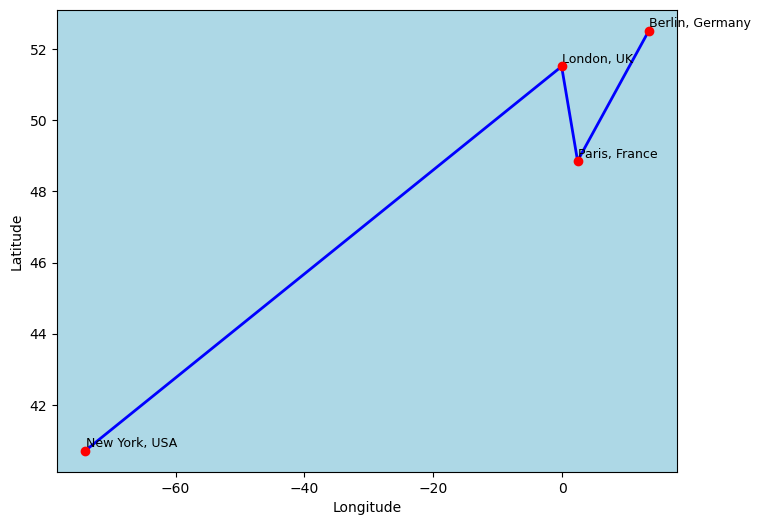

In [7]:
def save_image():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    # Plot the data again for saving
    latitudes, longitudes = zip(*coordinates)
    ax.scatter(longitudes, latitudes, color="red", zorder=5)
    ax.plot(longitudes, latitudes, color="blue", linewidth=2, zorder=3)
    
    for i, city in enumerate(cities):
        ax.text(longitudes[i] + 0.1, latitudes[i] + 0.1, city, fontsize=9)
    
    ax.set_facecolor("lightblue")
    
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    # Save to an image file
    plt.savefig("city_map.png", bbox_inches='tight')
    
save_image()


### Step 7: Display the Saved Image (Optional)

In [8]:
def display_image():
    img = Image.open("city_map.png")
    img.show()

display_image()
